In [24]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

iris = datasets.load_iris()
X = iris.data
Y = iris.target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [25]:
def kNN(u, X, Y, k):
    # Calculate the distance between u and each point in X
    distances = np.sqrt(np.sum((X - u)**2, axis=1))

    # Get the indices of the k nearest neighbors
    neighbors_indices = np.argsort(distances)[:k]

    # Get the labels of the k nearest neighbors
    neighbors_labels = Y[neighbors_indices]

    # Calculate the weights inversely proportional to distance
    weights = 1 / (distances[neighbors_indices] + 1e-5)  # Add a small value to avoid division by zero

    # For classification, find the class with the maximum weighted votes
    unique_labels, counts = np.unique(neighbors_labels, return_counts=True)
    weighted_counts = np.zeros_like(counts)
    for i, label in enumerate(unique_labels):
        weighted_counts[i] = np.sum(weights[neighbors_labels == label])
    return unique_labels[np.argmax(weighted_counts)]


In [26]:
# Exclude several examples from Iris Dataset for unknown examples
U_indices = np.random.choice(len(X_test), size=10, replace=False)
U = X_test[U_indices]

for u in U:
    prediction = kNN(u, X_train, Y_train, k=3)
    print(f"Unknown sample {u} is classified as {iris.target_names[prediction]}")


Unknown sample [6.1 2.8 4.7 1.2] is classified as versicolor
Unknown sample [5.4 3.4 1.5 0.4] is classified as setosa
Unknown sample [6.5 3.2 5.1 2. ] is classified as virginica
Unknown sample [6.7 2.5 5.8 1.8] is classified as virginica
Unknown sample [6.8 2.8 4.8 1.4] is classified as versicolor
Unknown sample [6.1 3.  4.9 1.8] is classified as virginica
Unknown sample [6.5 3.  5.8 2.2] is classified as virginica
Unknown sample [5.7 2.8 4.5 1.3] is classified as versicolor
Unknown sample [6.4 2.8 5.6 2.1] is classified as virginica
Unknown sample [7.7 2.6 6.9 2.3] is classified as virginica


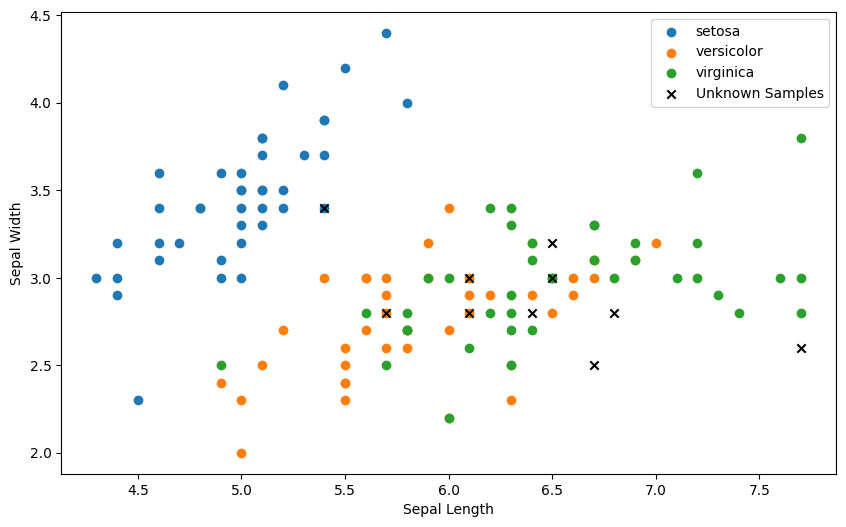

In [27]:
plt.figure(figsize=(10, 6))
for i, class_name in enumerate(iris.target_names):
    plt.scatter(X_train[Y_train == i][:, 0], X_train[Y_train == i][:, 1], label=class_name)
plt.scatter(U[:, 0], U[:, 1], c='k', marker='x', label='Unknown Samples')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()